# Weather Analysis

Below is a record of the weather for each day per hour during the year of 2012. This is a time series dataset that contains records of a certain undetermined location. It records the Temperature, Dew Point Temperature, Humidity Percentage, Wind Speed, Visibility, Pressure and Weather Conditions.

We will perform a EDA on the set below.

In [242]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
os.chdir('/Users/denniscapili/Dropbox/Data_Analyst/Portfolio/Weather')
os.getcwd()

'/Users/denniscapili/Dropbox/Data_Analyst/Portfolio/Weather'

In [285]:
weather = pd.read_csv('weather_data.csv')
weather_modified = weather
weather_modified

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [244]:
weather_modified.shape

(8784, 8)

In [286]:
list(weather_modified.columns)

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'Weather']

## Cleaning Dataset

In [290]:
### Optimizing column names
weather_modified.rename(columns = 
        {'Date/Time' : 'Date_',
         'Temp_C' : 'Temp_',
         'Dew Point Temp_C' : 'Dew_Point', 
         'Rel Hum_%' : 'Humidity',
        'Wind Speed_km/h' : 'Wind_Speed',
        'Visibility_km' : 'Visibility',
        'Weather' : 'Weather_Condition'}, inplace = True)
weather_modified.head(1)

,Date_,Temp_,Dew_Point,Humidity,Wind_Speed,Visibility,Press_kPa,Weather_Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog


In [247]:
weather_modified[['Date', 'Time']] = weather_modified['Date_'].str.split(' ', expand = True)
weather_modified

,Date_,Temp,Dew_Point,Humidity,Wind_Speed,Visibility,Press_kPa,Weather_Condition,Date,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012,2:00
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012,3:00
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012,4:00
...,...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,12/31/2012,19:00
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,12/31/2012,20:00
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,12/31/2012,21:00
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,12/31/2012,22:00


In [193]:
## converting C to F
def celsius_to_fahr(temp_c):
    temp_f = (temp_c + 32) * 9 / 5
    return temp_f

In [291]:
celsius_to_fahr(weather_modified['Temp_'])

0       54.36
1       54.36
2       54.36
3       54.90
4       54.90
        ...  
8779    57.78
8780    57.96
8781    56.70
8782    57.24
8783    57.60
Name: Temp_, Length: 8784, dtype: float64

In [292]:
weather_modified['Temp_F'] = celsius_to_fahr(weather_modified['Temp_'])


In [293]:
weather_modified.head(3)

,Date_,Temp_,Dew_Point,Humidity,Wind_Speed,Visibility,Press_kPa,Weather_Condition,Temp_F
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,54.36
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,54.36
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",54.36


In [129]:
weather_modified.isnull().sum()

Date/Time            0
Temp                 0
Dew_Point            0
Humidity             0
Wind_Speed           0
Visibility           0
Press_kPa            0
Weather_Condition    0
dtype: int64

## Understanding the Data

In [317]:
weather_modified.describe()

,Temp_,Dew_Point,Humidity,Wind_Speed,Visibility,Press_kPa,Temp_F
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,73.436660
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,21.038189
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,15.660000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,57.780000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,74.340000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,91.440000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,117.000000


In [233]:
# List of all days
weather_modified.Date.value_counts()

1/1/2012      24
9/8/2012      24
9/6/2012      24
9/5/2012      24
9/4/2012      24
              ..
4/30/2012     24
4/29/2012     24
4/28/2012     24
4/27/2012     24
12/31/2012    24
Name: Date, Length: 366, dtype: int64

In [117]:
weather_modified.Weather_Condition.value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

<AxesSubplot:>

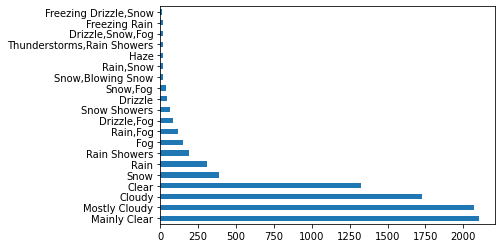

In [165]:
# Below are the top 20 values, entire list was not enetered due to majority hold a value of 1 

weather_modified.Weather_Condition.value_counts().sort_values().nlargest(20).plot(kind = 'barh')

## Analysis of Clear Days

Majority of the days within the year was "Mainly Clear", to find more insight we will look into the likley conditions that went along with a clear day.


In [167]:
# Description of the Temperatures
weather_modified.Temp_F.describe()

count    8784.000000
mean       73.436660
std        21.038189
min        15.660000
25%        57.780000
50%        74.340000
75%        91.440000
max       117.000000
Name: Temp_F, dtype: float64

In [251]:
weather_modified['Temp_F'].value_counts()

87.48     65
59.58     58
59.04     47
60.30     45
92.34     44
          ..
20.34      1
19.80      1
114.84     1
116.28     1
19.26      1
Name: Temp_F, Length: 533, dtype: int64

<AxesSubplot:>

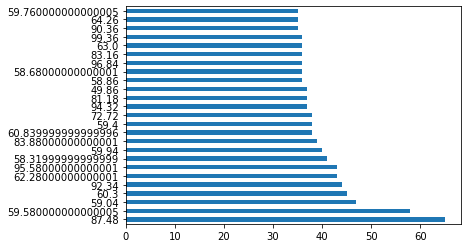

In [254]:
# Top 25 temperatures
weather_modified['Temp_F'].value_counts().sort_values().nlargest(25).plot(kind = 'barh')

(array([  50.,  245.,  691., 1037., 1469., 1109., 1338., 1450., 1142.,
         253.]),
 array([ 15.66 ,  25.794,  35.928,  46.062,  56.196,  66.33 ,  76.464,
         86.598,  96.732, 106.866, 117.   ]),
 <BarContainer object of 10 artists>)

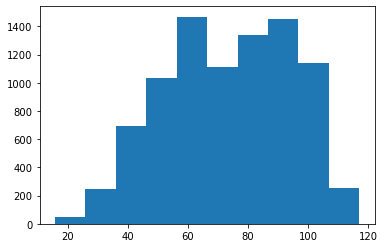

In [284]:
# Histogram of Average Temperatures
x = np.linspace(0,120,8784)
y = weather_modified.Temp_F

plt.hist(y)
##plt.plot(x,y,marker='.')

In [302]:
# Clear weather and visibility from 40 km and above
weather_modified[(weather_modified['Weather_Condition'] == 'Clear') & (weather_modified['Visibility'] > 40)]



,Date_,Temp_,Dew_Point,Humidity,Wind_Speed,Visibility,Press_kPa,Weather_Condition,Temp_F
351,1/15/2012 15:00,-15.4,-22.8,53,24,48.3,102.71,Clear,29.88
352,1/15/2012 16:00,-15.1,-22.8,52,24,48.3,102.79,Clear,30.42
425,1/18/2012 17:00,-11.3,-18.8,54,26,48.3,101.54,Clear,37.26
440,1/19/2012 8:00,-13.7,-18.4,68,19,48.3,101.84,Clear,32.94
441,1/19/2012 9:00,-12.7,-17.2,69,17,48.3,101.73,Clear,34.74
...,...,...,...,...,...,...,...,...,...
8384,12/15/2012 8:00,-10.7,-15.6,67,13,48.3,102.69,Clear,38.34
8385,12/15/2012 9:00,-10.4,-15.9,64,19,48.3,102.74,Clear,38.88
8389,12/15/2012 13:00,-8.4,-14.7,60,19,48.3,102.64,Clear,42.48
8631,12/25/2012 15:00,-7.1,-13.7,59,17,48.3,101.98,Clear,44.82


In [308]:
# Clear weather and visibility of 30 km and below
weather_modified[(weather_modified['Weather_Condition'] == 'Clear') & (weather_modified['Visibility'] < 30)]



,Date_,Temp_,Dew_Point,Humidity,Wind_Speed,Visibility,Press_kPa,Weather_Condition,Temp_F
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear,27.18
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear,44.82
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear,41.04
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear,39.96
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear,41.40
...,...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear,33.48
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear,46.62
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear,36.18
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear,36.36


In [311]:
#Checking humidity during days with clear weather
weather_modified [(weather_modified['Weather_Condition'] =='Clear') & (weather_modified['Humidity'] > 50)]
                  
                  

,Date_,Temp_,Dew_Point,Humidity,Wind_Speed,Visibility,Press_kPa,Weather_Condition,Temp_F
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear,44.82
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear,41.04
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear,39.96
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear,41.40
241,1/11/2012 1:00,-10.7,-17.8,56,17,25.0,101.49,Clear,38.34
...,...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear,33.48
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear,46.62
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear,36.18
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear,36.36


In [312]:
weather_modified.Wind_Speed.value_counts()

9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
83      1
70      1
63      1
54      1
Name: Wind_Speed, dtype: int64

In [316]:
# Checking wind conditions during clear days, out of 1225 days 265 days were above 10 mph/16 kph
weather_modified[(weather_modified['Weather_Condition'] == 'Clear') & (weather_modified['Wind_Speed'] > 16)]
                 
                 

,Date_,Temp_,Dew_Point,Humidity,Wind_Speed,Visibility,Press_kPa,Weather_Condition,Temp_F
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear,27.18
241,1/11/2012 1:00,-10.7,-17.8,56,17,25.0,101.49,Clear,38.34
242,1/11/2012 2:00,-12.0,-18.9,56,19,25.0,101.57,Clear,36.00
243,1/11/2012 3:00,-12.7,-19.4,57,19,25.0,101.64,Clear,34.74
244,1/11/2012 4:00,-13.4,-20.1,57,17,25.0,101.66,Clear,33.48
...,...,...,...,...,...,...,...,...,...
8394,12/15/2012 18:00,-9.1,-15.1,62,17,25.0,102.54,Clear,41.22
8396,12/15/2012 20:00,-8.7,-15.1,60,20,25.0,102.50,Clear,41.94
8631,12/25/2012 15:00,-7.1,-13.7,59,17,48.3,101.98,Clear,44.82
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear,46.62


### Final Summary

Based on the analysis of the weather conditions in 2012 we have concluded our findings of the data.

1. Majority of the days in 2012 were cosidered "Mainly Clear"[2106] with "Mostly Cloudy" [2069] coming in a close second.
2. The average temperatures were 73 F, with a max of 117 F
3. Out of the 2106 totals of "Mainly Clear" there were 313 moments with visibility of 40 km and above, and 1013 moments with visibility of 30 km and below
4. Out of the 2106 totals of "Mainly Clear" there 1070 moments where the humidity levels were above humidity percentage of 50%
5. Lastly, there were 265 moments where the wind gusts were above 16 kph/10mph